# Lesson 2: Probability



## Exercise 1: Monty Hall problem

>- Simulate three doors, one car, and two goats.
>- Simulate three players: the switcher, the conservative, and the newcomer. 
>- Record who wins.
>- Repeat it many times.
>- Which player do you want to be?
>
>- What would happen if you had 100 doors to choose from and the presenter opens 98 or them?


- Each toy experiment is a run of the game where each player chooses randomly a door and either wins or loses
- Repeat for 100 runs

In [4]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(404)
wins = [0,0,0] # Wins of conservative, switcher, newcomer
N_runs = 10000

for i in range(N_runs):
    doors = [0,0,1] # 0 is goat, 1 is car
    np.random.shuffle(doors) # Uses random.random() function

    pl0 = np.random.choice([0,1,2]) #Conservative 
    pl1 = np.random.choice([0,1,2]) #Switcher

    # We can already say if the conservative player won:
    if doors[pl0] == 1 :
        wins[0] += 1

    # After a goat is showed, if the switcher has the car, he loses; if he as the goat, he wins:
    if doors[pl1] == 0 : 
        wins[1] +=1

    # After a goat is showed, there are 2 doors, one wins and the other loses, indifferently from what happened before.
    # As it does not matter which goat we remove, we choose the first one in the list:
    doors.remove(0)

    pl2 = np.random.choice([0,1]) #Newcomer

    if doors[pl2] == 1:
        wins[2] += 1

win_perc = [x/N_runs * 100 for x in wins]

In [5]:
print('Win percentages: \n \
    Conservative: %.2f %%  \n \
    Switcher: %.2f %%  \n \
    Newcomer %.2f %%' %tuple(win_perc))


Win percentages: 
     Conservative: 33.11 %  
     Switcher: 66.59 %  
     Newcomer 49.87 %


- We obtain the expected probabilities.

### Generalization to N doors

In [14]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(406)
n_doors = 20
n_open = 18
N_runs = 100000

wins = [0,0,0] # Wins of conservative, switcher, newcomer

for i in range(N_runs):
    
    doors = np.zeros(n_doors) # 0 is goat, 1 is car
    doors[0] += 1
    np.random.shuffle(doors) # Uses random.random() function
    numbers = np.array(range(n_doors)) 
    doors = doors[:,np.newaxis]
    numbers = numbers[:,np.newaxis]
    doors = np.concatenate((numbers,doors), axis=1) # now "doors" is an array of couples (every door has a label)

    for i in range(n_doors): 
        if doors[i,1] == 1:
            car = int(doors[i,0])

    pl0 = np.random.choice(range(n_doors)) #Conservative 
    pl1 = np.random.choice(range(n_doors)) #Switcher


    # We can already say if the conservative player won:
    if doors[pl0,1] == 1 :
        wins[0] += 1

    # We need the list of doors that can be opened (we delete the door of pl1 and the door with the car)

    if pl1 == car : # If the switcher has the car, he loses for sure
        continue

    if n_doors - n_open == 2 : # if the switcher does not have the car, and there is only 1 door to choose, he wins for sure
        wins[1] += 1
        continue
    
    
    car_door = doors[car]
    car_door = car_door[np.newaxis,:]
    doors_new = doors
    doors_new = np.delete(doors, (pl1,car) ,0) # Preventing player and car doors from being opened (deleted)
  
    for i in range(n_open):
        doors_new = np.delete(doors_new, 0, 0) # Openening doors () deleting them from list)

    doors_new = np.concatenate((doors_new, car_door))
    door_choice = doors_new[:,0]

    pl1_second = int(np.random.choice(door_choice)) #Switcher's second guess

    if doors[pl1_second,1] == 1 : 
        wins[1] +=1

# Cycle for Newcomer (could not insert before because of the pl1 == car control statement that prevents trying to delete the same door twice)

for i in range(N_runs):
    doors = np.zeros(n_doors) 
    doors[0] += 1
    np.random.shuffle(doors)
    numbers = np.array(range(n_doors)) 
    doors = doors[:,np.newaxis]
    numbers = numbers[:,np.newaxis]
    doors = np.concatenate((numbers,doors), axis=1) 

    for i in range(n_doors): 
        if doors[i,1] == 1:
            car = int(doors[i,0])
    
    car_door = doors[car]
    car_door = car_door[np.newaxis,:]
    doors_new = doors
    doors_new = np.delete(doors, (car) ,0) # Preventing car door from being opened (deleted)
  
    for i in range(n_open):
        doors_new = np.delete(doors_new, 0, 0) # Openening doors (deleting them from list)

    doors_new = np.concatenate((doors_new, car_door))
    door_choice = doors_new[:,0]

    pl2 = int(np.random.choice(door_choice)) # Newcomer guess

    if doors[pl2,1] == 1 : 
        wins[2] +=1

win_perc = [x/N_runs * 100 for x in wins]

In [15]:
print('Win percentages: \n \
    Conservative: %.2f %%  \n \
    Switcher: %.2f %%  \n \
    Newcomer %.2f %%' %tuple(win_perc))

Win percentages: 
     Conservative: 5.12 %  
     Switcher: 95.06 %  
     Newcomer 49.88 %


As expected, we see the following behaviours:
- The win frequency for the conservative player is always around 1%
- The win frequency for the switcher becomes very high when both the number of doors and the number of opened doors increase (is around 99% when 98 out of 100 doors are opened). We expect this behaviour because when only 2 doors are left, the win probability of the switcher is 1/n_doors.
- The win frequency for the newcomer increases with the number of opened doors and reaches a maximum at around 50% when the maximum number of doors are open (only 2 doors are left)

---

## Exercise 2: pdf of log()

>1. Use `numpy` to draw $N$ (where $N$ is large...) random samples from a uniform distribution between $0.1$ and $10$, and store these samples as $x$.
>2. Use matplotlib to make a histogram of these samples.
>3. Compute the base-10 log of your array $x$, and store this as $y$.
>4. Make another histogram for $y$. Using the equation to transform probability distributions, write what the theoretical pdf of $y$ is, and overplot it onto your histogram.
>5. Compute the log of the mean of $x$ and the mean of $y$. Now compute the log of the median of $x$ and the median of $y$. 
>We have $x$ random variable with $p(x) = \frac{1}{10-0.1}$. To compute the pdf of $y$ we use the conservation of dimensionless probability:

$$ y = \log_{10}(x) \rightarrow  x = 10^y $$

$$ p(y) = \left| \frac{dx}{dy} \right| \cdot p(x)= \frac{\ln{10}}{10-0.1} \cdot 10^y $$

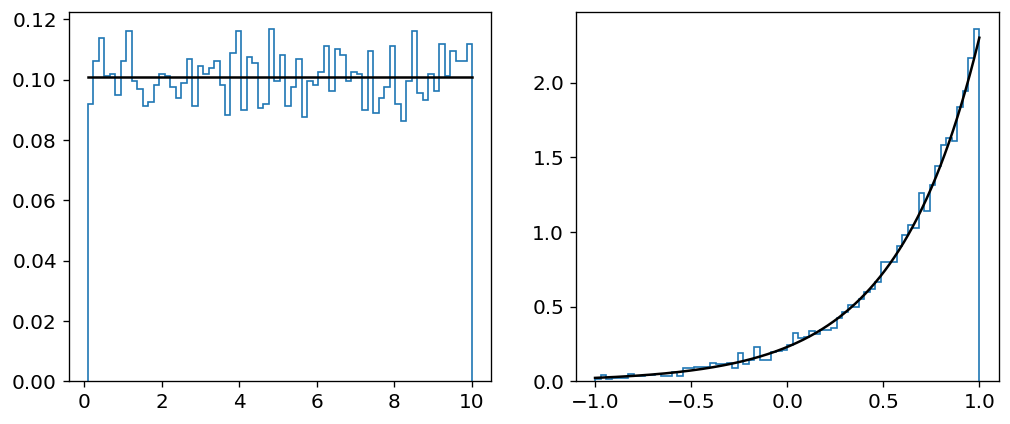

In [19]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#-------  Mpl params  ----------------
%matplotlib inline
mpl.rc('figure', figsize=(10, 4), dpi=120)
plt.rcParams.update({'font.size': 12})
#--------------------------------------------

fig, ax = plt.subplots(1,2)

x = np.random.default_rng(404).uniform(0.1,10,10000) # Uniform random sample
y = np.log10(x)

nbins = 100
xgrid = np.linspace(0.1, 10, 1000)
ygrid = np.linspace(-1, 1, 1000)

ax[0].hist(x,density=True,bins=70,histtype='step',lw=1, label='Histogram, 100 bins')
ax[1].hist(y,density=True,bins=70,histtype='step',lw=1, label='Histogram, 100 bins') 

def hx(x):
    return x*0 + 1/(10-0.1)

def hy(y):
    return 0.23 * 10 **y

if True:
    ax[0].plot(xgrid, hx(xgrid), color='black', zorder=3,
            label="$h(x)$, Generating Distribution")

if True:
    ax[1].plot(ygrid, hy(ygrid), color='black', zorder=3,
            label="$h(y)$, Generating Distribution")

plt.show()

In [21]:
log_mean_x = np.log10(np.mean(x))
mean_y = np.mean(y)

log_median_x = np.log10(np.median(x))
median_y = np.median(y)

print('Results: \n \
    Log of mean: %.2f   \n \
    Mean of log: %.2f   \n \
    Log of median: %.2f   \n \
    Median of log: %.2f ' %(log_mean_x, mean_y, log_median_x, median_y))

Results: 
     Log of mean: 0.70   
     Mean of log: 0.59   
     Log of median: 0.70   
     Median of log: 0.70 
